## LendingClub Case Study

## Objective of the Case Study

Main objective is to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.So that company can utilise this knowledge for its portfolio and risk assessment. And thus minimise the risk of losing money while lending to customers.

For this analysis we have to use  EDA process and develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

The analysis is divided into four main parts:

1.Data understanding

2.Data cleaning 

3.Data Analysis

4.Observations

## Importing all the required libraries

In [31]:
import pandas as pd
import numpy as np
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.get_option("display.max_columns")
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Load and read the dataset

In [109]:
df=pd.read_csv('loan.csv',low_memory=False)

In [75]:
pd.set_option("display.max_rows", 111, "display.max_columns", 111)

# Data Understanding

In [308]:
##checking few records from dataset
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [309]:
#Checking Shape of the dataset
df.shape

(39717, 111)

In [310]:
## Looking at all the column names
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [278]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   id                              int64  
 1   member_id                       int64  
 2   loan_amnt                       int64  
 3   funded_amnt                     int64  
 4   funded_amnt_inv                 float64
 5   term                            object 
 6   int_rate                        object 
 7   installment                     float64
 8   grade                           object 
 9   sub_grade                       object 
 10  emp_title                       object 
 11  emp_length                      object 
 12  home_ownership                  object 
 13  annual_inc                      float64
 14  verification_status             object 
 15  issue_d                         object 
 16  loan_status                     object 
 17  pymnt_plan                    

After looking into DataSet and data dictionary we can say,
There are mainly three types of variable in Dataset :-
    
1. Variables which are related to the applicant demographic(address,emp_title,id,member_id,url)

2. loan characteristics.(Loan amount,int_rate,approved_amount etc.)

3. Customer behaviour variables (loan details)

Some of the important columns in the dataset are annual income,loan_amount, term, int_rate, grade, purpose of the loan,emp_length etc which we can use for our analysis and get some useful insights.

The key variable which we want to compare across the independent variables is loan status.

Variable identification-
    
    The very first step in exploratory data analysis is to identify the type of variables in the dataset. Variables are of          two types — Numerical and Categorical

In [311]:
numeric_var= [var for var in df.columns if df[var].dtype!='O']
categorial_var=[var for var in df.columns if df[var].dtype=='O']

print('There are',len(numeric_var),'numerical variables')
print('There are',len(categorial_var),'Categorical variables')

There are 87 numerical variables
There are 24 Categorical variables


Checking any duplicte value in id  columns

In [312]:
#checking unique values for id column
df.id.nunique()

39717

Check how many variables having all missing values

In [313]:
print("Number of empty Columns:-")
print(df.isnull().all(axis=0).sum())

Number of empty Columns:-
54


Check how many rows have all missing values

In [314]:
print('Number of empty Rows:')
print(df.isnull().all(axis=1).sum())

Number of empty Rows:
0


During data understanding it is observed that there are a lot of columns with all null values. 
In this step will identify the null value columns and remove from dataset.

In [315]:
#list of variables having null values 
[val for val in df.columns if df[val].isnull().sum()>0]

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il

In [316]:
# count and % of null values in dataset
null_values=df.isnull().sum()
mean_null=df.isnull().mean()
per=round(df.isnull().sum()/len(df.index)*100,2)

nulls=pd.concat([null_values,mean_null,per],axis=1)
nulls.rename(columns={0:'Count',1:'Mean',2:'Percentage'},inplace=True)
nulls

,Count,Mean,Percentage
id,0,0.000000,0.00
member_id,0,0.000000,0.00
loan_amnt,0,0.000000,0.00
funded_amnt,0,0.000000,0.00
funded_amnt_inv,0,0.000000,0.00
term,0,0.000000,0.00
int_rate,0,0.000000,0.00
installment,0,0.000000,0.00
grade,0,0.000000,0.00
sub_grade,0,0.000000,0.00


In [110]:
#segregating the variables having large number of missing values

all_null = df.columns[100*(df.isnull().sum()/len(df.index)) > 30]
print(all_null)

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

## Data Cleansing:

In [111]:
#check shape of dataset 
print("Shape before removal: ",df.shape)

Shape before removal:  (39717, 111)


After analaysing data we found that there are several columns which are having maximum null values so those variables are not helpful in our analysis, so in next step removing those variables having Null values>30%

In [112]:
df = df.drop(all_null, axis=1)


In [113]:
#check shape of dataset after removal
print("Shape After removal: ",df.shape)

Shape After removal:  (39717, 53)


In [16]:
#checking null values after droping few variables.Still we have few columns having null values which need to take care.
100*(df.isnull().sum()/len(df.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

There are several variables having single value for all the rows or all unique values or few are encrepted so they don't contribute much in our analysis. Those are listed below:-
we can remove those variable form our analysis

id ,member_id ,pymnt_plan ,url 
id 
member_id
pymnt_plan
url 
zip_code
initial_list_status
policy_code 
application_type 
acc_now_delinq 
delinq_amnt 
collections_12_mths_ex_med




In [114]:
loan_df =df.drop(["id", "member_id", "emp_title",'title', 'url', 'zip_code','emp_title','collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','delinq_amnt','tax_liens'], axis=1)

In [115]:
#check shape of dataset after removal
print("Shape After removal: ",loan_df.shape)

Shape After removal:  (39717, 41)


Also few variables are not available at the time of loan application, and thus these variables cannot be used as predictors for loan approval.
We can safely remove those variables as well. like delinq_2yrs,earliest_cr_line,pub_rec etc

All these variables listed below are not available at the time of loan application it is loan related data which is available once loan get approved so this point of time i am ignoring these fields.

In [116]:
ln_post_approval_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
 "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]

Removing the behaviour variables from analysis


In [117]:
loan_df = loan_df.drop(ln_post_approval_var, axis=1)

In [142]:
print("Shape After removal: ",loan_df.shape)

Shape After removal:  (36654, 23)


In [143]:
#Remaning columns for analysis
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'pub_rec',
       'initial_list_status', 'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

Now we have removed all the columns which are not relevent for default analyisis. 
Checking for missing values after data Removing unrelevent variables

In [120]:
(loan_df.isna().sum()/len(loan_df.index))*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
pymnt_plan              0.000000
purpose                 0.000000
addr_state              0.000000
dti                     0.000000
pub_rec                 0.000000
initial_list_status     0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [121]:
#Check any rows having null values. There is no such data

df[df.isnull().sum(axis=1)>5]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


Next step is to handle missing values and Standardizing the data



For variable loan_status there are 3 unique values(Current,Full Paid,Charged Off) as per the goal of analysis we have to find those borrower who is likely to default in caparision to good customer. Which we can find in case of fully paid or charged off loans.We cannot make anything up for the current loans so safely we can remove this. And there is no null value for this variable so we are good.

In [144]:
#removing loan_status=Current from our dataset
loan_df=loan_df[~(loan_df.loan_status == "Current")]

In [145]:
#checkeng unique value of loan_status in dataset
loan_df.loan_status.unique()

['Fully Paid', 'Charged Off']
Categories (2, object): ['Fully Paid', 'Charged Off']

In [146]:
loan_df.shape

(36654, 23)

In [147]:
#count of each loan type
loan_df['loan_status'] = loan_df['loan_status'].astype('category')
print(loan_df['loan_status'].value_counts())

Fully Paid     31236
Charged Off     5418
Name: loan_status, dtype: int64


Next variable  is emp_length which is having missing values and need to format the values 

In [126]:
loan_df.emp_length.unique()

array(['10+ years', '< 1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '1 year', '6 years', '2 years', '7 years',
       nan], dtype=object)

Here we need to handle mising values for that we are using imputation method-technique used for replacing the missing data with some substitute value to retain most of the data/information of the dataset.

In [93]:
print("frequent value for emp_length is :" + loan_df.emp_length.mode()[0])

frequent value for emp_length is :10+ years


In [94]:
loan_df.emp_length.value_counts()


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

The mode value has higher frequency than the next most frequent value ie < 1 year.We can assign the value of mode to the null values in the column

In [332]:
loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
5          3 years
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38577, dtype: object

In [127]:
loan_df.emp_length.fillna('0',inplace=True)
loan_df.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,pub_rec,initial_list_status,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0,f,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0,f,0.0


In [128]:
# pub_rec_bankruptcies having null values so inputing nan with 0
print (loan_df.pub_rec_bankruptcies.dtypes)
print(loan_df.pub_rec_bankruptcies.unique())
print(loan_df.pub_rec_bankruptcies.isnull().sum())
loan_df.pub_rec_bankruptcies.fillna(0,inplace=True)
print(loan_df.pub_rec_bankruptcies.isnull().sum())

float64
[ 0.  1.  2. nan]
697
0


Need to Standardizing the data for analysis

In [129]:
# int_rate is having % so need remove
loan_df['int_rate'].apply(lambda n:n.split('%')[0])
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda n: pd.to_numeric(n.split("%")[0]))

In [130]:
loan_df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 38577, dtype: float64

In [131]:
loan_df['issue_d']=pd.to_datetime(loan_df.issue_d, format='%b-%y')

In [132]:
loan_df['issue_d'].dtypes

dtype('<M8[ns]')

In [133]:
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

In [134]:
#format employment length column to have only numbers
loan_df['emp_length']=pd.to_numeric(loan_df.emp_length.apply(lambda n: 1 if "<" in n else (n.split('+')[0] if "+" in n else n.split()[0])))

In [103]:
loan_df['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7,  0], dtype=int64)

In [231]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  int64         
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status     

## DATA ANALYSIS

Outlier Treatment

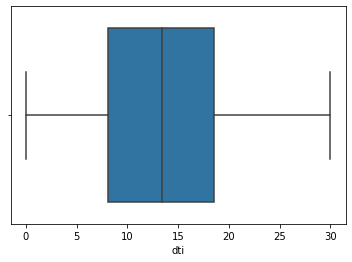

In [104]:

sns.boxplot(x='dti', data = loan_df)
plt.show()

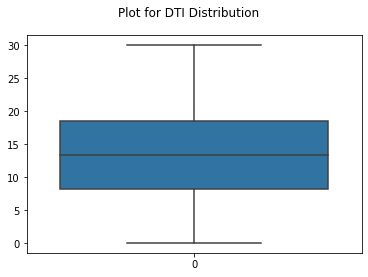

In [105]:
#Analysis for DTI 

sns.boxplot(data=loan_df.dti)

plt.suptitle('Plot for DTI Distribution')
plt.show()

There are no outliers and the distribution is pretty continous and very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

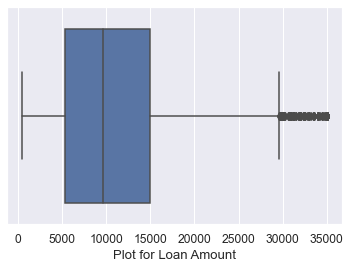

In [344]:
sns.boxplot(x='loan_amnt',data= loan_df)
plt.xlabel('Plot for Loan Amount')
plt.show()

In [345]:
loan_df.loan_amnt.quantile([0.25,0.50,0.75])

0.25     5300.0
0.50     9600.0
0.75    15000.0
Name: loan_amnt, dtype: float64

Mean Value for Loan Amount is 10000.

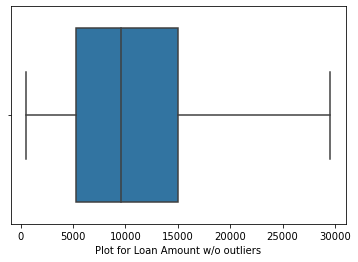

In [59]:
sns.boxplot(x = 'loan_amnt', data = loan_df, showfliers = False)
plt.xlabel('Plot for Loan Amount w/o outliers')
plt.show()


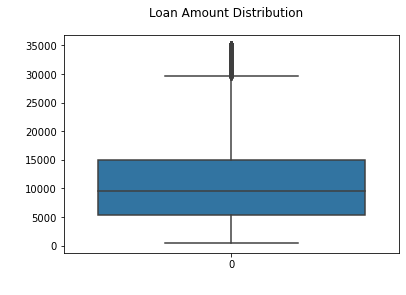

In [60]:
#Analysis for Loan Amount 

sns.boxplot(data=loan_df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount Distribution')
plt.xlabel('Loan Amount',fontsize=14,color = 'w') 
plt.ylabel('Count',fontsize=14,color = 'w') 
plt.show()

more number of applicate took loan amount of 10000, and also meadian of distribution is 10000. very few people took more than 30000 loan amount.

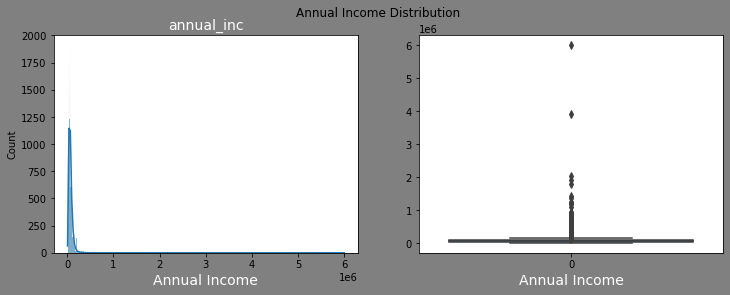

In [61]:
#Analysis for Annual Income 
plt.figure(figsize=(12,4),facecolor='gray')

plt.subplot(1, 2, 1)
ax = sns.histplot(loan_df['annual_inc'],kde=True)
ax.set_title('annual_inc',fontsize=14,color='w')
ax.set_xlabel('Annual Income',fontsize=14,color='w')

plt.subplot(1,2,2)
sns.boxplot(data=loan_df.annual_inc)
plt.xlabel('Annual Income',fontsize=14,color = 'w') 
#Single title for both subplots.
plt.suptitle('Annual Income Distribution')
plt.show()

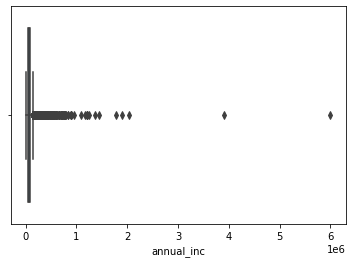

In [63]:
#Annual Amount
sns.boxplot(x='annual_inc',data = loan_df )
plt.show()

The values after 95 percentile seems to be disconected from the general distribution and also there is huge increase in the value for small quantile variation.

Considering threshold for removing outliers in annual_inc as 0.95

In [135]:
loan_df.annual_inc.quantile([0.5, 0.75,0.90,0.95])


0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
Name: annual_inc, dtype: float64

In [148]:
quan_95= loan_df['annual_inc'].quantile(0.95)


In [149]:
loan_df = loan_df[loan_df.annual_inc <= quan_95]

In [150]:
loan_df.shape

(34832, 23)

In [151]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'pub_rec',
       'initial_list_status', 'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

In [152]:
loan_df['annual_inc'].unique()

array([24000., 30000., 12252., ..., 33990., 36153., 27376.])

In [153]:
loan_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     54996.0
0.75     74000.0
0.90     92000.0
0.95    100000.0
0.97    107000.0
0.98    110000.0
0.99    113000.0
Name: annual_inc, dtype: float64

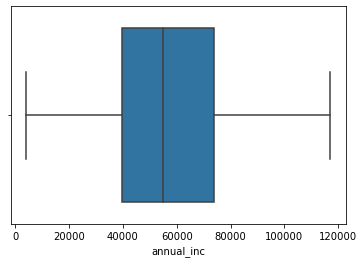

In [154]:
#plot after outliers treatment
sns.boxplot(x='annual_inc',data = loan_df )
plt.show()

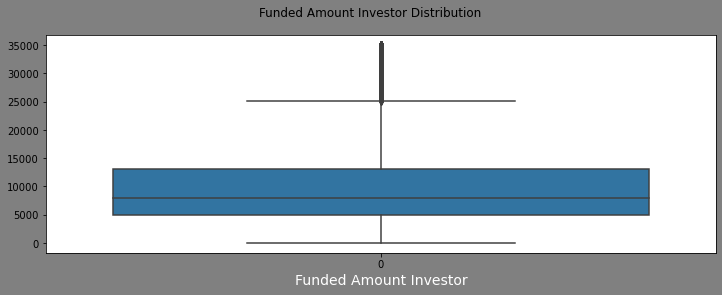

In [155]:
#Analysis for Funded Amt Investment 
plt.figure(figsize=(12,4),facecolor='gray')


sns.boxplot(data=loan_df.funded_amnt_inv)
plt.xlabel('Funded Amount Investor',fontsize=14,color = 'w') 
#Single title for both subplots.
plt.suptitle('Funded Amount Investor Distribution')
plt.show()

In [247]:
loan_df.funded_amnt_inv.quantile([0.5, 0.75,0.90])

0.50     8375.000000
0.75    13623.731415
0.90    19750.000000
Name: funded_amnt_inv, dtype: float64

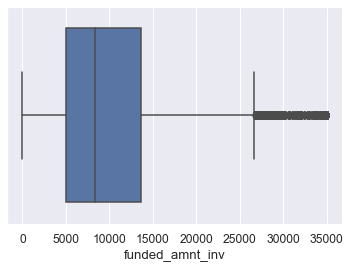

In [248]:
sns.boxplot(x=loan_df.funded_amnt_inv)
plt.show()

Funded amount investment data behaves similar to loan Amount, Which tells us that Funded approved almost same of Applied loan amount.

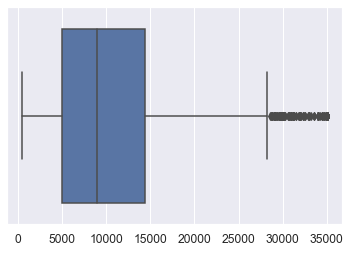

In [249]:
#Analysis for Funded Amount 


sns.boxplot(x=loan_df.funded_amnt)
plt.xlabel('Funded Amount',fontsize=14,color = 'w') 

plt.show()

In [250]:
loan_df.funded_amnt.quantile([0.5, 0.75,0.90, 0.95])

0.50     9000.0
0.75    14400.0
0.90    20000.0
0.95    25000.0
Name: funded_amnt, dtype: float64

Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

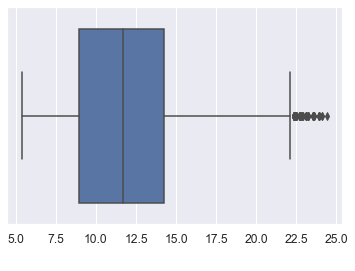

In [251]:
#Analysis for Interest Rate 




sns.boxplot(x=loan_df.int_rate)
plt.xlabel('Interest Rate',fontsize=14,color = 'w') 

plt.show()

In [156]:
loan_df.int_rate.quantile([0.25,0.5, 0.75,0.90, 0.95])

0.25     8.94
0.50    11.71
0.75    14.27
0.90    16.77
0.95    18.25
Name: int_rate, dtype: float64

Interest rates lies between 8.5% to 15%.For few loans interest rate is too high >20%

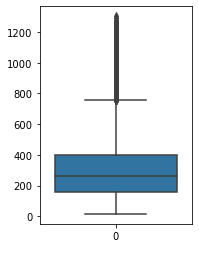

In [157]:

plt.subplot(1,2,2)
sns.boxplot(data=loan_df.installment)
plt.xlabel('installment',fontsize=14,color = 'w') 

plt.show()

In [187]:
loan_df.installment.quantile([0.25,0.5, 0.75,0.90, 0.95])

0.25    163.0800
0.50    270.4200
0.75    408.4800
0.90    588.9900
0.95    706.5575
Name: installment, dtype: float64

Most  value of Installment amount in around 200-250.

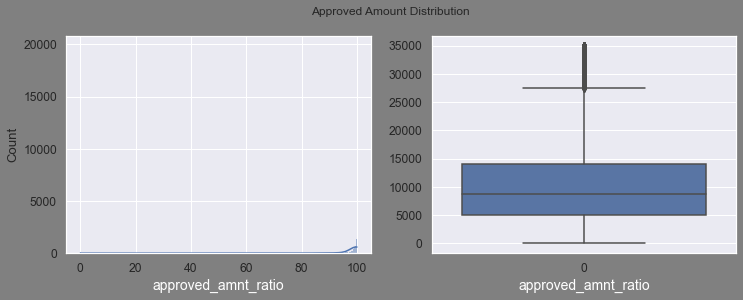

In [261]:
#trying to Analysis how much amount is approved from requested amount
loan_df['approved_amnt_ratio'] = round(loan_df.funded_amnt_inv*100/loan_df.loan_amnt,2)
plt.figure(figsize=(12,4),facecolor='gray')

plt.subplot(1, 2, 1)
sns.histplot(loan_df['approved_amnt_ratio'],kde=True)

plt.xlabel('approved_amnt_ratio',fontsize=14,color='w')

plt.subplot(1,2,2)
sns.boxplot(data=loan_df.funded_amnt_inv)
plt.xlabel('approved_amnt_ratio',fontsize=14,color = 'w') 
#Single title for both subplots.
plt.suptitle('Approved Amount Distribution')
plt.show()

In [160]:
loan_df.approved_amnt_ratio.describe(percentiles=[0.25,0.5,0.75,0.9])

count    34832.000000
mean        93.926623
std         17.239966
min          0.000000
25%         98.330000
50%        100.000000
75%        100.000000
90%        100.000000
max        100.000000
Name: approved_amnt_ratio, dtype: float64

Most of applicate got 100% loan amount.

Loans dataset is baised towards Fullypaid loans.We are analyzing and visualizing defaulter data with respect to fully paid loans. 

In [161]:
#percentage of each loan type in dataset
loan_df.loan_status.value_counts(normalize=True)*100

Fully Paid     85.048232
Charged Off    14.951768
Name: loan_status, dtype: float64

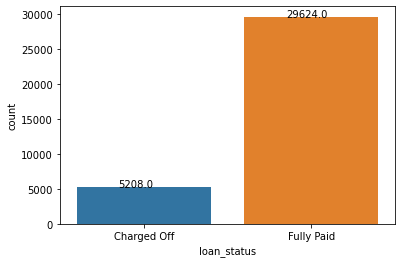

In [165]:
y=sns.countplot(x = 'loan_status', data = loan_df)

for x in y.patches:
    y.annotate('{:.1f}'.format(x.get_height()), (x.get_x()+0.25, x.get_height()+0.01))

plt.show()



Loans dataset is baised towards Fullypaid loans.
only 14% of loan are having status as defaulters.

In [166]:
#pub_rec Analysis rather then count if we consider percentage of value would give better insight
loan_df.pub_rec.unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [379]:
temp1 = loan_df['pub_rec'].value_counts(normalize=True).reset_index()
temp1
print(temp1.rename(columns={'index': 'pub_rec', 'pub_rec': 'Ratio of each pub_rec'}))

   pub_rec  Ratio of each pub_rec
0        0               0.946341
1        1               0.052181
2        2               0.001244
3        3               0.000181
4        4               0.000052


In [380]:
temp1=temp1.rename(columns={'index': 'Public Derogatory', 'pub_rec': 'Ratio of each pub_rec'})

In [381]:
temp1

,Public Derogatory,Ratio of each pub_rec
0,0,0.946341
1,1,0.052181
2,2,0.001244
3,3,0.000181
4,4,0.000052


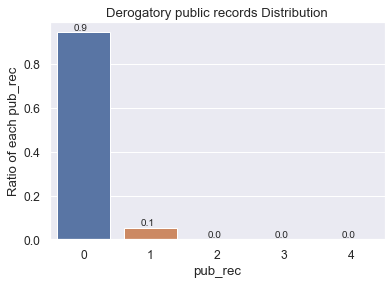

In [382]:
ax=sns.barplot(x='Public Derogatory', y='Ratio of each pub_rec', data=temp1)
plt.xlabel('pub_rec')
plt.ylabel('Ratio of each pub_rec')
plt.title('Derogatory public records Distribution')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

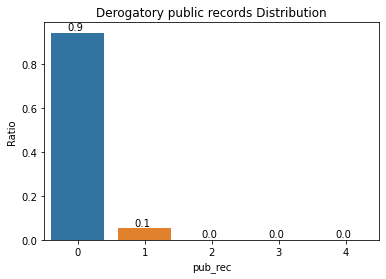

In [168]:
ax=sns.barplot(x='index', y='pub_rec',, data=temp1)
plt.xlabel('pub_rec')
plt.ylabel('Ratio')
plt.title('Derogatory public records Distribution')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

Around 10% applicant having Derogatory public records.Derogatory public reflect financial obligations that were not paid as agreed. so if any applicate fall under this have high chances of charged off.

In [383]:
loan_df.pub_rec_bankruptcies.unique()

array([0., 1., 2.])

In [171]:
temp2 = loan_df['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
temp2

,index,pub_rec_bankruptcies
0,0.0,0.955644
1,1.0,0.044212
2,2.0,0.000144


In [388]:
temp2=temp2.rename(columns={'index': 'Public record bankruptcies', 'pub_rec_bankruptcies': 'Ratio of each public record bankruptcies'})
temp2

,Public record bankruptcies,Ratio of each public record bankruptcies
0,0.0,0.955644
1,1.0,0.044212
2,2.0,0.000144


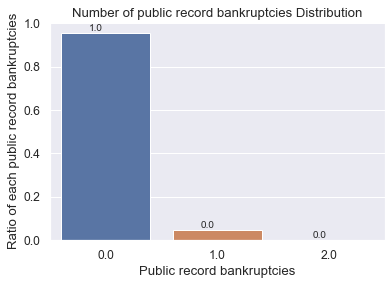

In [389]:
ax=sns.barplot(x='Public record bankruptcies', y='Ratio of each public record bankruptcies', data=temp2)
plt.xlabel('Public record bankruptcies')
plt.ylabel('Ratio of each public record bankruptcies')
plt.title('Number of public record bankruptcies Distribution')
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

More then 95% Applicant have no record for bankruptcey. If any applicate having public bankruptcies high chances of loan to be charged off.

In [390]:
loan_df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

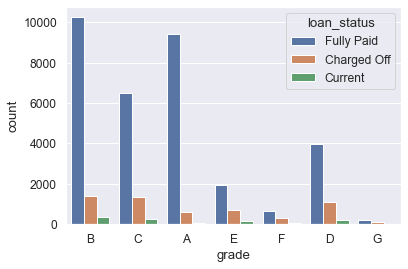

In [399]:
sns.countplot(x='grade', data=df,hue="loan_status")
plt.show()

In [400]:
temp3 = loan_df['grade'].value_counts(normalize=True).reset_index()
temp3

,index,grade
0,B,0.302641
1,A,0.260388
2,C,0.203074
3,D,0.131814
4,E,0.069031
5,F,0.025300
6,G,0.007751


In [401]:
temp3=temp3.rename(columns={'index': 'Grade of Applicants', 'grade': 'Ratio of each Grades'})
temp3

,Grade of Applicants,Ratio of each Grades
0,B,0.302641
1,A,0.260388
2,C,0.203074
3,D,0.131814
4,E,0.069031
5,F,0.025300
6,G,0.007751


Text(0.5, 1.0, 'Grade Distribution')

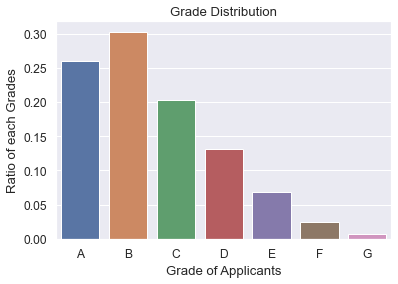

In [403]:

sns.barplot(x='Grade of Applicants', y='Ratio of each Grades', data=temp3,order=order)
plt.xlabel('Grade of Applicants')
plt.ylabel('Ratio of each Grades')
plt.title('Grade Distribution')

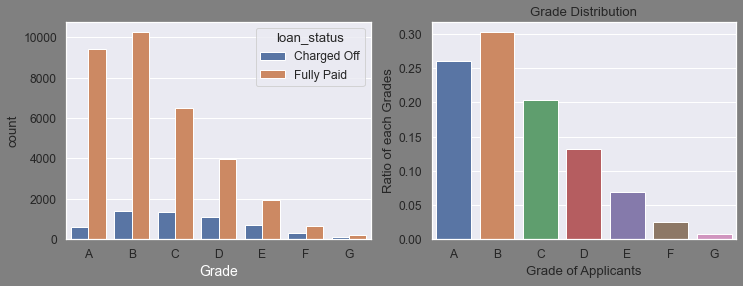

In [404]:
#Analysis for Grade



order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

plt.figure(figsize=(12,4),facecolor='gray')

plt.subplot(1, 2, 1)
ax = sns.countplot(x='grade', data=loan_df,hue="loan_status",order=order)
ax.set_xlabel('Grade',fontsize=14,color='w')

plt.subplot(1,2,2)
sns.barplot(x='Grade of Applicants', y='Ratio of each Grades', data=temp3,order=order)
plt.xlabel('Grade of Applicants')
plt.ylabel('Ratio of each Grades')
plt.title('Grade Distribution')

plt.show()

Most of the applicate fall under grade A,B for both type of loans

In [178]:
temp4 = loan_df['emp_length'].value_counts(normalize=True).reset_index()
temp4

,index,emp_length
0,10,0.209836
1,1,0.202515
2,2,0.113258
3,3,0.104559
4,4,0.087850
5,5,0.083687
6,6,0.056902
7,7,0.045073
8,8,0.036375
9,9,0.031207


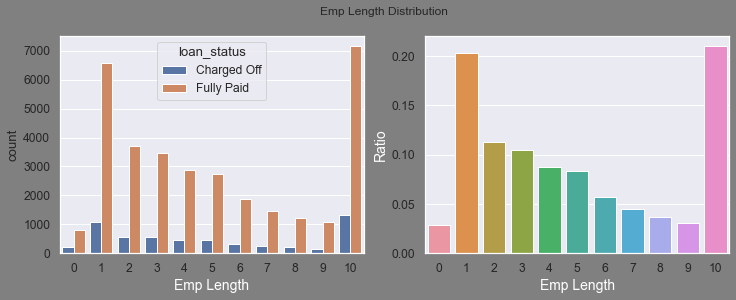

In [486]:
plt.figure(figsize=(12,4),facecolor='gray')

plt.subplot(1, 2, 1)
ax = sns.countplot(x='emp_length', data=loan_df,hue="loan_status")
ax.set_xlabel('Emp Length',fontsize=14,color='w')

plt.subplot(1,2,2)
sns.barplot(x='index', y='emp_length', data=temp4)
plt.xlabel('Emp Length',fontsize=14,color = 'w') 
plt.ylabel('Ratio',fontsize=14,color = 'w') 
plt.suptitle('Emp Length Distribution')
plt.show()

In Lending Club dataset most of the applicate are 10+year excprience for both loan type.

Text(0.5, 1.0, 'Employee_Length Vs Funded Amount')

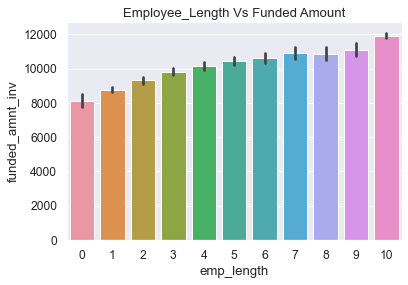

In [491]:
sns.barplot(x='emp_length', y='funded_amnt_inv', data=loan_df)
plt.title('Employee_Length Vs Funded Amount')

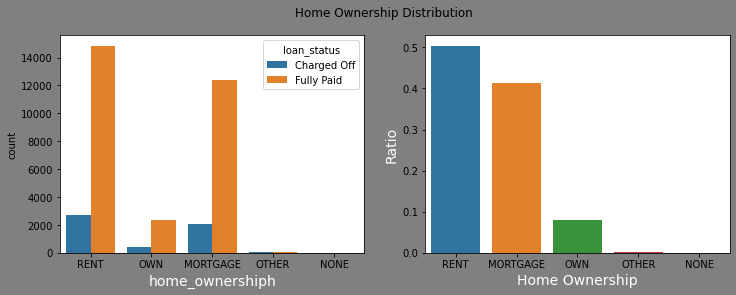

In [181]:
temp_a = loan_df['home_ownership'].value_counts(normalize=True).reset_index()
temp_a

plt.figure(figsize=(12,4),facecolor='gray')

plt.subplot(1, 2, 1)
ax = sns.countplot(x='home_ownership', data=loan_df,hue="loan_status")
ax.set_xlabel('home_ownershiph',fontsize=14,color='w')

plt.subplot(1,2,2)
sns.barplot(x='index', y='home_ownership', data=temp_a)
plt.xlabel('Home Ownership',fontsize=14,color = 'w') 
plt.ylabel('Ratio',fontsize=14,color = 'w') 
plt.suptitle('Home Ownership Distribution')
plt.show()

For both type loans probability for Home Ownership is Rented

In [182]:
temp5 = loan_df['verification_status'].value_counts(normalize=True).reset_index()
temp5

,index,verification_status
0,Not Verified,0.452314
1,Verified,0.297428
2,Source Verified,0.250258


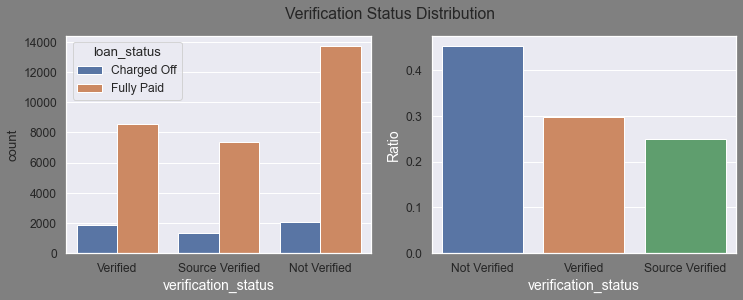

In [187]:
plt.figure(figsize=(12,4),facecolor='gray')

plt.subplot(1, 2, 1)
ax = sns.countplot(x='verification_status', data=loan_df,hue="loan_status")
ax.set_xlabel('verification_status',fontsize=14,color='w')

plt.subplot(1,2,2)
sns.barplot(x='index', y='verification_status', data=temp5)
plt.xlabel('verification_status',fontsize=14,color = 'w') 
plt.ylabel('Ratio',fontsize=14,color = 'w') 
plt.suptitle('Verification Status Distribution')
plt.show()

% of not Verifed loan is high for both the loans.

In [411]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  object        
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   sub_grade             38577 non-null  object        
 8   emp_length            38577 non-null  int64         
 9   home_ownership        38577 non-null  object        
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  object        
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status     

In [437]:
loan_df.int_rate.mean()

11.932218679523526

In [420]:
 loan_df["Int_rate_Segment"]=loan_df['int_rate'].apply(lambda x:'Low' if x <=8 else 'Mediam' if x>8 and x<=12 else 'High')

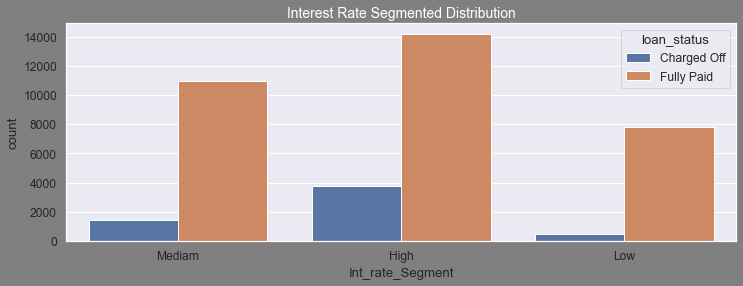

In [431]:
plt.figure(figsize=(12,4),facecolor='gray')
sns.countplot(x='Int_rate_Segment', data=loan_df,hue="loan_status")
plt.title('Interest Rate Segmented Distribution',fontsize=14,color='w')
plt.show()

In [ ]:
There is high chances of default if interest rate is high

In [438]:
print("Min",loan_df.installment.min())
print("Median",loan_df.installment.median())
print(loan_df.installment.max())

Min 15.69
Median 277.86
1305.19


In [447]:
loan_df["installment_segment"]=loan_df['installment'].apply(lambda x:'Low' if x <=150 else 'Mediam' if x>150 and x<=350  else'High' if x>350 and x<=550 else 'To High')

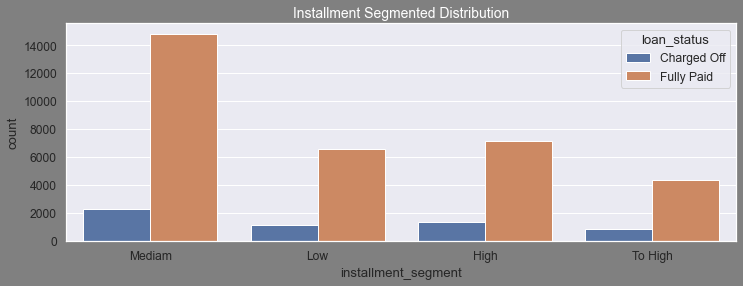

In [449]:
plt.figure(figsize=(12,4),facecolor='gray')
sns.countplot(x='installment_segment', data=loan_df,hue='loan_status')
plt.title('Installment Segmented Distribution',fontsize=14,color='w')
plt.show()

In [ ]:
Higher the installment

In [450]:
loan_df['installment_segment'].value_counts(normalize=True).reset_index()

,index,installment_segment
0,Mediam,0.443969
1,High,0.220727
2,Low,0.200197
3,To High,0.135106


from above not getting any clear insight.

Correlation Matrix for Quantitative Variables :

Below are the observations of correlation Matrix:-

1. All three amounts (Loan amount, investor amount, funding amount) are strongly correlated.
2. As we can see Annual income and DTI are negatively correalted with each other.That means when Annual income is low DTI is      high & vice versa.
3. DTI is the percentage of a consumer's monthly gross income that goes toward paying debts. 
4. there are positive correlation between annual income and employment years.As employment years increases annual income increases        


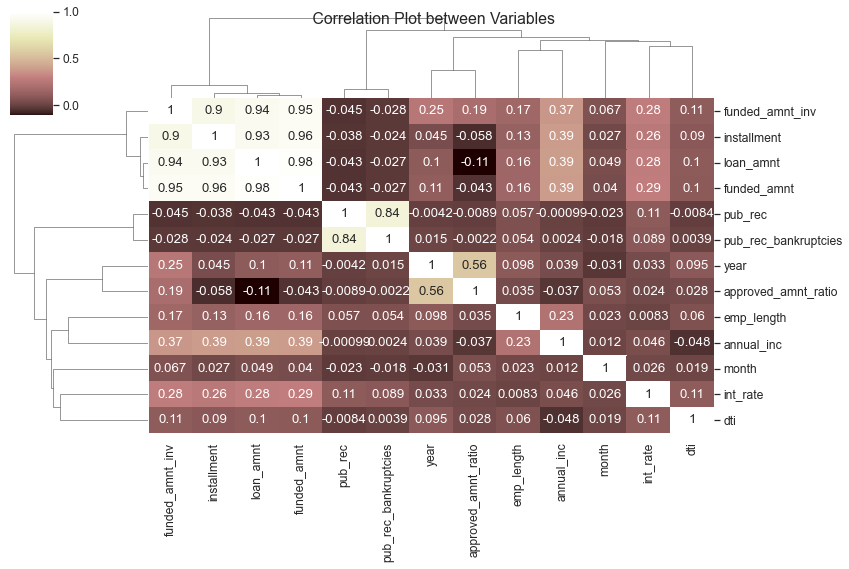

In [188]:


loan_df.corr()
sns.set(font_scale=1.1)
g=sns.clustermap(loan_df.corr(),annot=True,figsize=(12, 8),cmap='pink')
g.fig.suptitle('            Correlation Plot between Variables        ') 
#g.set(xlabel=‘my x label’, ylabel=‘my y label’)
#plt.title('Correlation Graph',loc='right')
#plt.title("Correlation Graph")
plt.show()

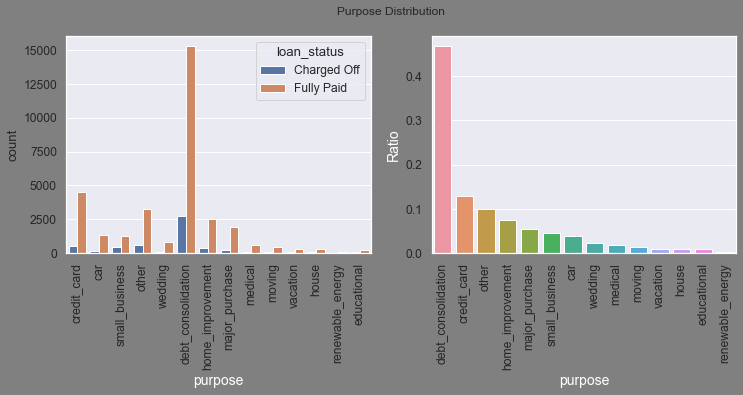

In [426]:
temp5 = loan_df['purpose'].value_counts(normalize=True).reset_index()
temp5

plt.figure(figsize=(12,4),facecolor='gray')

plt.subplot(1, 2, 1)
sns.countplot(x='purpose', data=loan_df,hue="loan_status")
plt.xlabel('purpose',fontsize=14,color='w')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='index', y='purpose', data=temp5)
plt.xlabel('purpose',fontsize=14,color = 'w') 
plt.ylabel('Ratio',fontsize=14,color = 'w') 
plt.suptitle('Purpose Distribution')
plt.xticks(rotation=90)
plt.show()

most of the applicant  took loan for debt consolidation which is same for both loans

In [190]:
loan_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

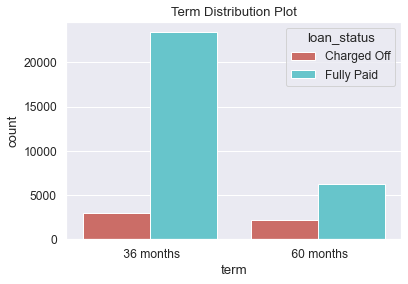

In [191]:
sns.countplot(x="term",data=loan_df,hue='loan_status',palette='hls')
plt.title('Term Distribution Plot')
plt.show()


For Charge off loan Tenure of 36 months is high same as Fully Paid Loans

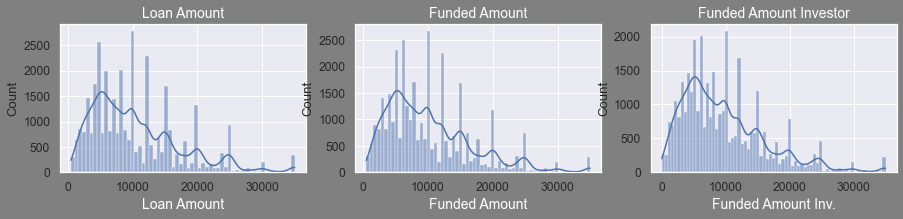

In [193]:
plt.figure(figsize=(15,6),facecolor='gray')

plt.subplot(2, 3, 1)
sns.histplot(loan_df['loan_amnt'],kde=True)
plt.title('Loan Amount',fontsize=14,color='w')
plt.xlabel('Loan Amount',fontsize=14,color='w')

plt.subplot(2, 3, 2)
sns.histplot(loan_df['funded_amnt'],kde=True)
plt.title('Funded Amount',fontsize=14,color='w')
plt.xlabel('Funded Amount',fontsize=14,color='w')

plt.subplot(2, 3, 3)
ax = sns.histplot(loan_df['funded_amnt_inv'],kde=True)
plt.title('Funded Amount Investor',fontsize=14,color='w')
plt.xlabel('Funded Amount Inv.',fontsize=14,color='w')
plt.show()

 Distribution of all the 3 amounts are equally distributed.

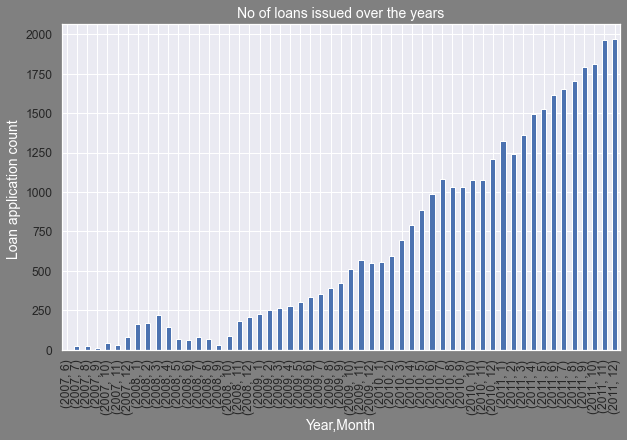

In [168]:
plt.figure(figsize=(10,6),facecolor='gray')
loan_df.groupby(['year','month']).size().plot(kind = "bar")
plt.title("No of loans issued over the years",fontsize=14,color='w')
plt.ylabel('Loan application count ',fontsize=14,color='w')
plt.xlabel('Year,Month',fontsize=14,color = 'w')      

plt.show()

Form above plot we can conclude that Loan application increases gradually over the years

In [74]:
print(loan_df['annual_inc'].describe())


count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64


In [194]:
loan_df['annual_Increment_bins'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

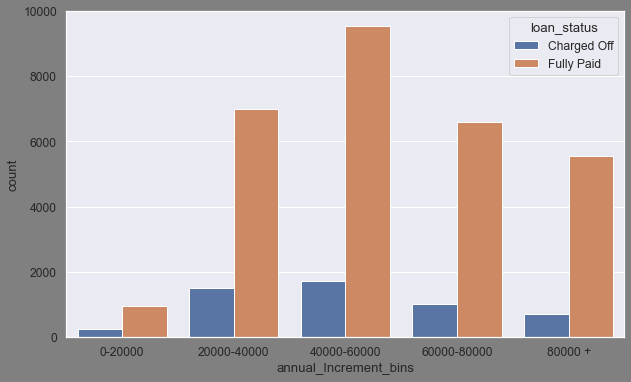

In [195]:
plt.figure(figsize=(10,6),facecolor='gray')
sns.countplot( x="annual_Increment_bins",hue='loan_status',  data=loan_df)
plt.show()

Annual income for defaulter applicate is between 40k-60k

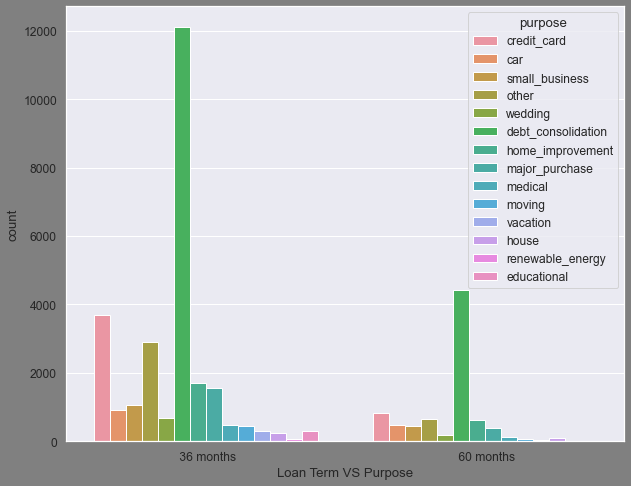

In [196]:
plt.figure(figsize=(10,8),facecolor='gray')
sns.countplot( x="term",  hue='purpose', data=loan_df)
plt.xlabel('Loan Term VS Purpose')
plt.show()

Tenaure 36 is highest in number for "debt_consolation" 

## Segmented Analysis

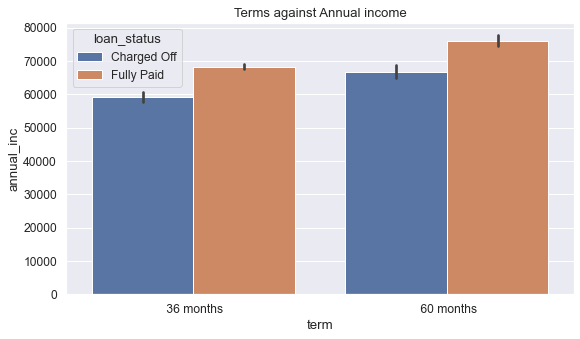

In [367]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='term', y='annual_inc',hue='loan_status', data=loan_df)
plt.title('Terms against Annual income')
plt.show()



Annual income is high for 60 months term

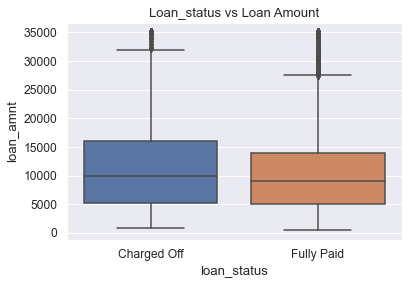

In [202]:
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_df)
plt.title('Loan_status against Loan Amount')
plt.show()

Loan amount for charge off loan is high from fully paid. 25 quartile is same but increase gradually.

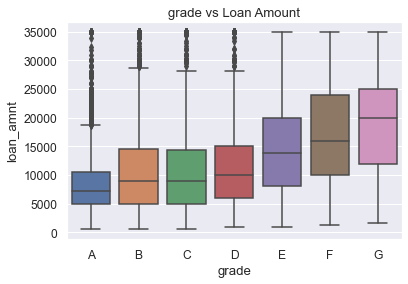

In [205]:
sns.boxplot(x='grade', y='loan_amnt', data=loan_df,order=order)
plt.title('grade against Loan Amount')
plt.show()

As grade increases loan amount increases

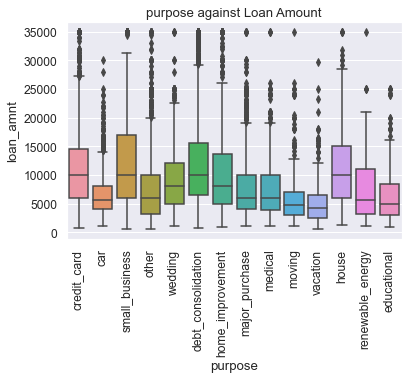

In [209]:
sns.boxplot(x='purpose', y='loan_amnt', data=loan_df)
plt.title('purpose against Loan Amount')
plt.xticks(rotation=90)
plt.show()

Loan amount is high for Small bussiness

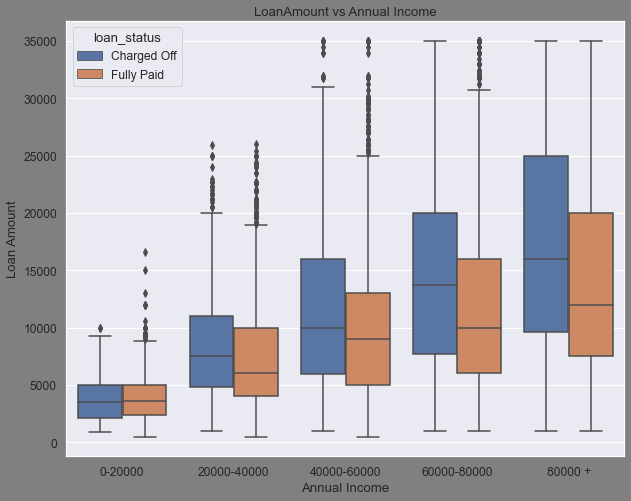

In [210]:
plt.figure(figsize=(10,8),facecolor='gray')
sns.boxplot(x = "annual_Increment_bins", y = "loan_amnt", hue = 'loan_status', data = loan_df)
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('LoanAmount vs Annual Income')
plt.show()

As Annual Income  increases loan amount also increases.

In [215]:
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])

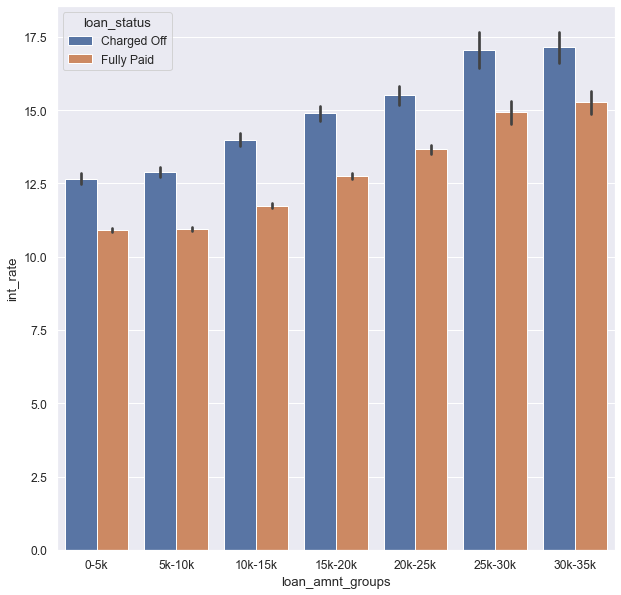

In [81]:
plt.figure(figsize=(10,10))
sns.barplot(x='loan_amnt_groups', y='int_rate', hue ='loan_status',data =loan_df)
plt.show()

Applicants whose income is 25k-35k and received interest at the rate of 17.5-25% have higher chances of default

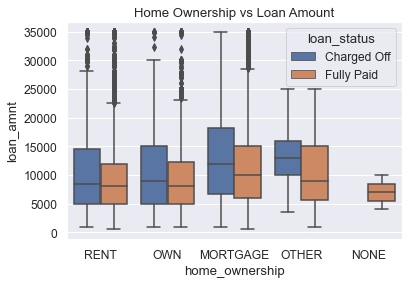

In [211]:

sns.boxplot(x='home_ownership', y='loan_amnt',hue='loan_status', data=loan_df)
plt.title('Home Ownership vs Loan Amount')
plt.show()

If Home ownership is Mortgage then loan amount is quite high

In [106]:
loan_df.loan_amnt.describe()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

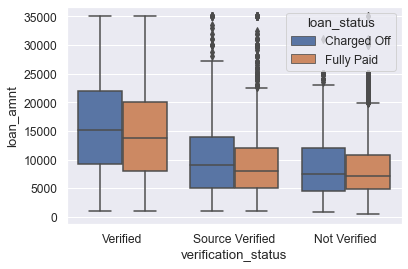

In [213]:
#verification_status_ord = loan_df.verification_status.unique()
#verification_status_ord.sort()
sns.boxplot(x='verification_status', y=loan_df.loan_amnt,hue='loan_status', data=loan_df)
plt.show()

Observation from above graph is if loan amount is high Varification status is verified

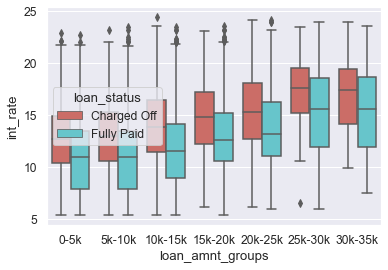

In [216]:

sns.boxplot(data =loan_df,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="hls")
plt.show()


we can clearly see that rate of intrest is higher for charge off loans having loan amount is high.

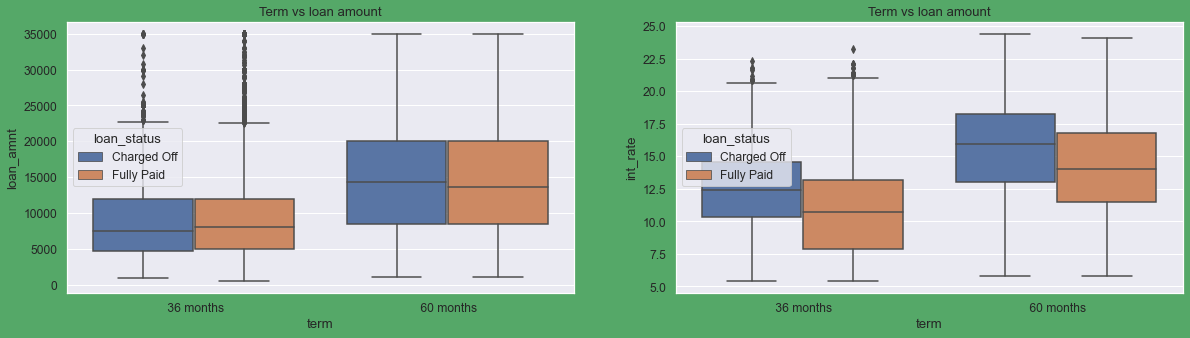

In [223]:
plt.figure(figsize=(20,5),facecolor='g')
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=loan_df)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=loan_df)
plt.title('Term vs loan amount')
plt.show()

Term=60 Monts Loan amount is high as well as Interest Rate is also high

Text(0.5, 1.0, 'Issued year vs Loan Amount')

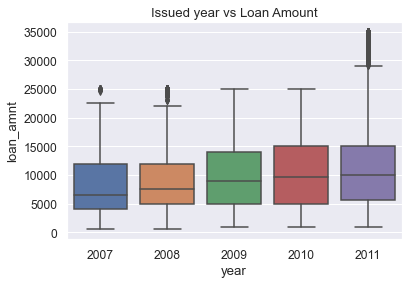

In [258]:



sns.boxplot(x='year', y='loan_amnt', data=loan_df)
plt.title('Issued year vs Loan Amount')



Text(0.5, 1.0, 'Issued year vs Loan Amount')

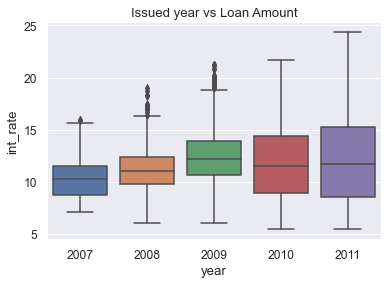

In [259]:
sns.boxplot(x='year', y='int_rate', data=loan_df)
plt.title('Issued year vs Int_Rate')

In [ ]:
Distribution of loan amount is not change for year 2010 and 2011 but int_rate changes significantly

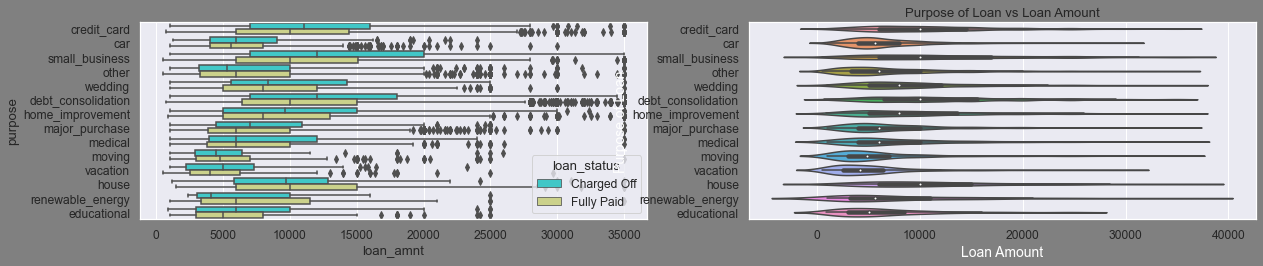

In [231]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.boxplot(y='purpose', x='loan_amnt',hue ='loan_status', data =loan_df,palette='rainbow')
plt.subplot(2, 2, 2)

sns.violinplot(y='purpose', x='loan_amnt', data =loan_df)
plt.title('Purpose of Loan vs Loan Amount')
plt.ylabel('Purpose of Loan',fontsize=14,color = 'w')
plt.xlabel('Loan Amount',fontsize=14,color = 'w')
plt.show()


loan amount is highest if loan is taken for small business.
If we see violinplot Loan taken for small business purpose, Debt consolidation and Credit card are somewhat evenly distributed

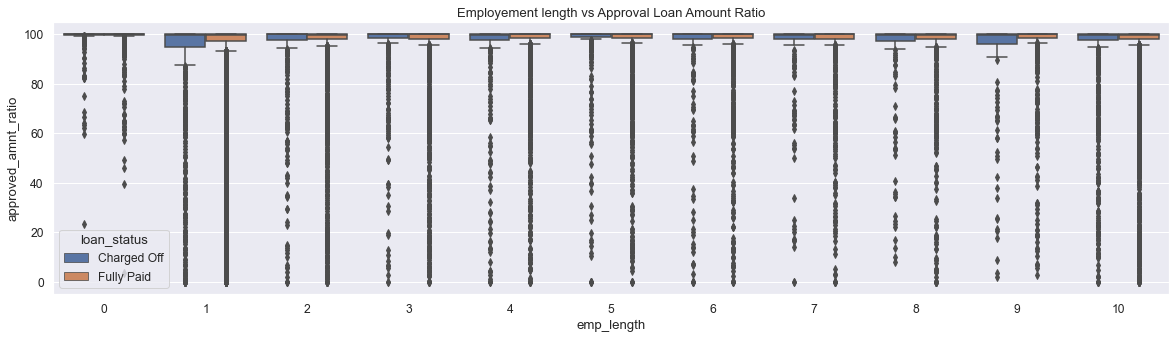

In [264]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y='approved_amnt_ratio',hue='loan_status', data=loan_df)
plt.title('Employement length vs Approval Loan Amount Ratio')
plt.show()

No relation can be identified using above graph

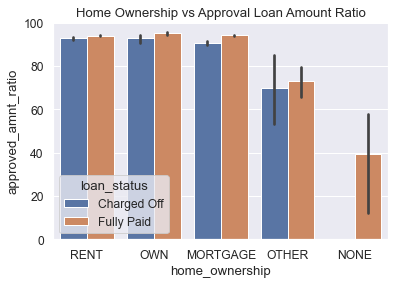

In [268]:

sns.barplot(x='home_ownership', y=loan_df.approved_amnt_ratio,hue='loan_status', data=loan_df)
plt.title('Home Ownership vs Approval Loan Amount Ratio')
plt.show()

Applicate having ownership as other and none having less approved amt ratio

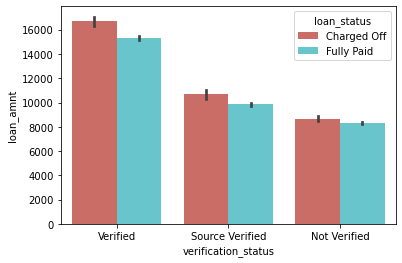

In [169]:
sns.barplot(data =loan_df,y='loan_amnt', x='verification_status', hue ='loan_status',palette="hls")
plt.show()

Loan Amout is high for verified loans.When the loan is verified and loan amount is high there is more probability of default

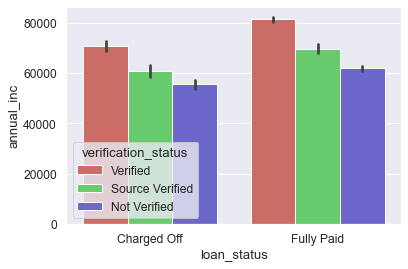

In [534]:
sns.barplot(data =loan_df,y='annual_inc', x='loan_status',hue='verification_status',palette="hls")
plt.show()

Loan Amout is high for verified loans.When the loan is verified and loan amount is high there is more probability of default

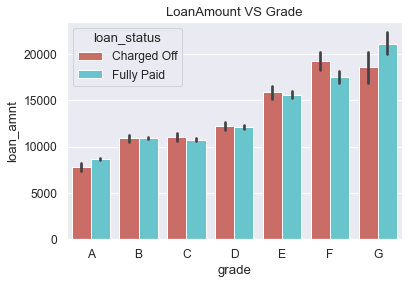

In [452]:
plt.figure(figsize=(6,4))
sns.barplot(data =loan_df,x='grade', y='loan_amnt', hue ='loan_status',palette="hls", order=['A','B','C','D','E','F','G'])
plt.title('LoanAmount VS Grade')
plt.show()

Default rate is high when grade is F and loan amount is between 15k-20k

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

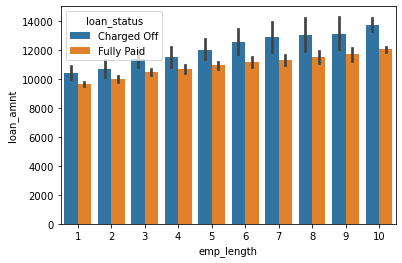

In [172]:
sns.barplot(y='loan_amnt', x='emp_length', hue ='loan_status',data =loan_df)

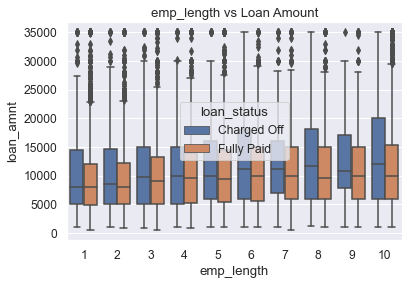

In [131]:
sns.boxplot(x='emp_length', y=loan_df.loan_amnt, hue='loan_status',data=loan_df)
plt.title('emp_length vs Loan Amount')
plt.show()

As emp_length increases loan amount is also increases and chances of default ia also increases.

In [135]:
term_lstatus

,term,loan_status,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,initial_list_status,pub_rec_bankruptcies,year,month,approved_amnt_ratio,annual_inc_bins
0,36 months,Charged Off,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114
1,36 months,Fully Paid,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607,24607
2,60 months,Charged Off,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304,2304
3,60 months,Fully Paid,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629,6629


In [270]:
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

In [271]:
loan_df.groupby(['annual_inc_groups', 'loan_status']).count()


loan_amnt  funded_amnt  funded_amnt_inv  term  \
annual_inc_groups loan_status                                                  
0-20000           Charged Off        237          237              237   237   
                  Fully Paid         943          943              943   943   
20000-40000       Charged Off       1514         1514             1514  1514   
                  Fully Paid        7004         7004             7004  7004   
40000-60000       Charged Off       1729         1729             1729  1729   
                  Fully Paid        9534         9534             9534  9534   
60000-80000       Charged Off       1024         1024             1024  1024   
                  Fully Paid        6597         6597             6597  6597   
80000 +           Charged Off       1122         1122             1122  1122   
                  Fully Paid        8859         8859             8859  8859   

                               int_rate  installment  grade  sub_grade  \
annual_inc_groups loan_status                                            
0-20000           Charged Off       237          237    237        237   
                  Fully Paid        943          943    943        943   
20000-40000       Charged Off      1514         1514   1514       1514   
                  Fully Paid       7004         7004   7004       7004   
40000-60000       Charged Off      1729         1729   1729       1729   
                  Fully Paid       9534         9534   9534       9534   
60000-80000       Charged Off      1024         1024   1024       1024   
                  Fully Paid       6597         6597   6597       6597   
80000 +           Charged Off      1122         1122   1122       1122   
                  Fully Paid       8859         8859   8859       8859   

                               emp_length  home_ownership  annual_inc  \
annual_inc_groups loan_status                                           
0-20000           Charged Off         237             237         237   
                  Fully Paid          943             943         943   
20000-40000       Charged Off        1514            1514        1514   
                  Fully Paid         7004            7004        7004   
40000-60000       Charged Off        1729            1729        1729   
                  Fully Paid         9534            9534        9534   
60000-80000       Charged Off        1024            1024        1024   
                  Fully Paid         6597            6597        6597   
80000 +           Charged Off        1122            1122        1122   
                  Fully Paid         8859            8859        8859   

                               verification_status  issue_d  pymnt_plan  \
annual_inc_groups loan_status                                             
0-20000           Charged Off                  237      237         237   
                  Fully Paid                   943      943         943   
20000-40000       Charged Off                 1514     1514        1514   
                  Fully Paid                  7004     7004        7004   
40000-60000       Charged Off                 1729     1729        1729   
                  Fully Paid                  9534     9534        9534   
60000-80000       Charged Off                 1024     1024        1024   
                  Fully Paid                  6597     6597        6597   
80000 +           Charged Off                 1122     1122        1122   
                  Fully Paid                  8859     8859        8859   

                               purpose  addr_state   dti  pub_rec  \
annual_inc_groups loan_status                                       
0-20000           Charged Off      237         237   237      237   
                  Fully Paid       943         943   943      943   
20000-40000       Charged Off     1514        1514  1514     1514   
                  Fully Paid      7004        7004  7004  

In [291]:
temp_grade=loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack()
temp_grade

loan_status,Charged Off,Fully Paid
grade,,
A,602,9443
B,1425,10250
C,1347,6487
D,1118,3967
E,715,1948
F,319,657
G,101,198


In [292]:
temp_grade.columns=temp_grade.columns.astype('str')

In [293]:
temp_grade["Total"]=temp_grade["Fully Paid"]+temp_grade['Charged Off']

In [294]:
temp_grade["Charged Off_ratio"]=temp_grade['Charged Off']/temp_grade["Total"]

In [295]:
temp_grade["Fully Paid Ratio"]=temp_grade['Fully Paid']/temp_grade["Total"]

In [296]:
temp_grade=temp_grade.reset_index()

In [297]:
temp_grade

loan_status,grade,Charged Off,Fully Paid,Total,Charged Off_ratio,Fully Paid Ratio
0,A,602,9443,10045,0.059930,0.940070
1,B,1425,10250,11675,0.122056,0.877944
2,C,1347,6487,7834,0.171943,0.828057
3,D,1118,3967,5085,0.219862,0.780138
4,E,715,1948,2663,0.268494,0.731506
5,F,319,657,976,0.326844,0.673156
6,G,101,198,299,0.337793,0.662207


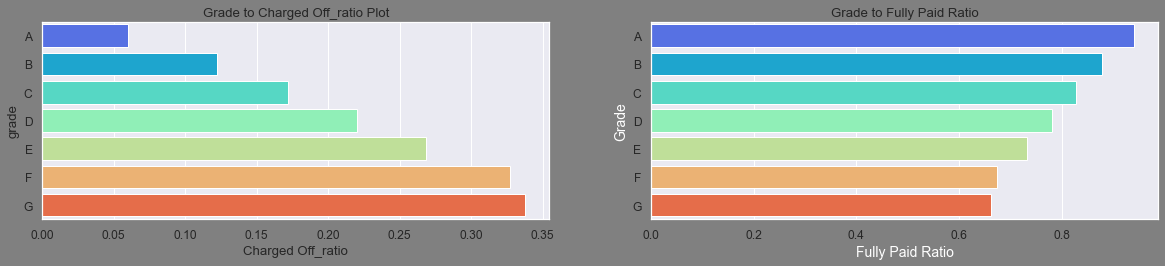

In [305]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(y='grade', x='Charged Off_ratio', data=temp_grade,palette='rainbow')
plt.title('Grade to Charged Off_ratio Plot')
plt.subplot(2, 2, 2)

sns.barplot(y='grade', x='Fully Paid Ratio', data=temp_grade,palette='rainbow')
plt.title('Grade to Fully Paid Ratio')
plt.ylabel('Grade',fontsize=14,color = 'w')
plt.xlabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.show()

Chances of default is increasing with grade moving from "A" to "G"
Grade "A" has very less chances of charged off.
Grade "F" and "G" have very high chances of charged off.


In [306]:
temp=loan_df.groupby(['annual_inc_groups', 'loan_status']).loan_status.count().unstack()
temp

loan_status,Charged Off,Fully Paid
annual_inc_groups,,
0-20000,237,943
20000-40000,1514,7004
40000-60000,1729,9534
60000-80000,1024,6597
80000 +,1122,8859


In [307]:
temp.columns=temp.columns.astype('str')

In [309]:
temp.reset_index()

loan_status,annual_inc_groups,Charged Off,Fully Paid
0,0-20000,237,943
1,20000-40000,1514,7004
2,40000-60000,1729,9534
3,60000-80000,1024,6597
4,80000 +,1122,8859


In [310]:
temp["Total"]=temp['Charged Off']+temp["Fully Paid"]

In [311]:
temp["Charged Off_ratio"]=temp['Charged Off']/temp["Total"]

In [312]:
temp["Charged Off_ratio"]=temp["Charged Off_ratio"].round(2)

In [316]:
temp["Fully Paid Ratio"]=temp['Fully Paid']/temp["Total"]

In [317]:
temp=temp.reset_index()
temp

loan_status,index,annual_inc_groups,Charged Off,Fully Paid,Total,Charged Off_ratio,Fully Paid Ratio
0,0,0-20000,237,943,1180,0.20,0.799153
1,1,20000-40000,1514,7004,8518,0.18,0.822259
2,2,40000-60000,1729,9534,11263,0.15,0.846489
3,3,60000-80000,1024,6597,7621,0.13,0.865634
4,4,80000 +,1122,8859,9981,0.11,0.887586


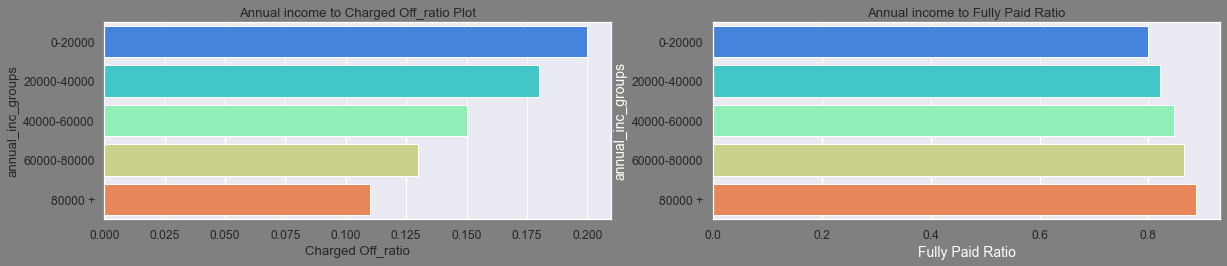

In [323]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(y='annual_inc_groups', x='Charged Off_ratio', data=temp,palette='rainbow')
plt.title('Annual income to Charged Off_ratio Plot')
plt.subplot(2, 2, 2)

sns.barplot(y='annual_inc_groups', x='Fully Paid Ratio', data=temp,palette='rainbow')
plt.title('Annual income to Fully Paid Ratio')
plt.ylabel('annual_inc_groups',fontsize=14,color = 'w')
plt.xlabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.show()

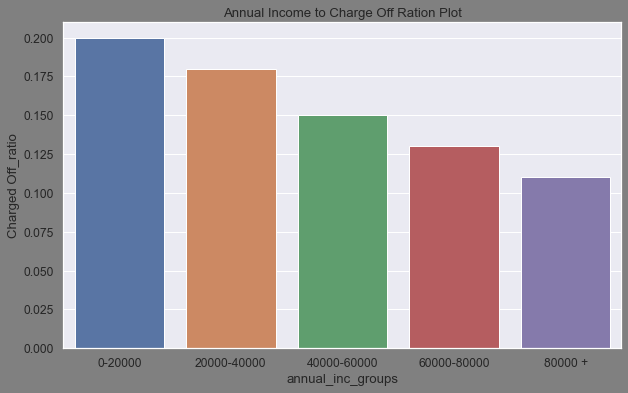

In [164]:
plt.subplots(figsize=(10, 6),facecolor='gray')
sns.barplot(x='annual_inc_groups', y='Charged Off_ratio', data=temp)
plt.title("Annual Income to Charge Off Ration Plot")
plt.show()

Annual Income increases Chargeoff descreses. Chances of defaulter is high if annaul income is in range of 0-20000 

In [467]:
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13','12.5-16','16 +'])
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,pub_rec,initial_list_status,pub_rec_bankruptcies,year,month,approved_amnt_ratio,annual_inc_groups,int_rate_groups,Int_rate_Segment,installment_segment
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0,f,0.0,2011,12,99.50,20000-40000,10-13,Mediam,Mediam
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0,f,0.0,2011,12,100.00,20000-40000,12.5-16,High,Low
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0,f,0.0,2011,12,100.00,0-20000,12.5-16,High,Low
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0,f,0.0,2011,12,100.00,40000-60000,12.5-16,High,Mediam
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,AZ,11.20,0,f,0.0,2011,12,100.00,20000-40000,0-10,Low,Mediam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,n,home_improvement,CO,11.33,0,f,0.0,2007,7,43.00,80000 +,0-10,Mediam,Low
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,n,credit_card,NC,6.40,0,f,0.0,2007,7,10.29,0-20000,10-13,Mediam,Mediam
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,n,debt_consolidation,MA,2.30,0,f,0.0,2007,7,26.50,80000 +,0-10,Mediam,Mediam
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,n,other,MD,3.72,0,f,0.0,2007,7,13.00,80000 +,0-10,Low,Mediam


In [331]:
temp_int = loan_df.groupby(['int_rate_groups', 'loan_status']).loan_status.count().unstack()
temp_int.columns=temp_int.columns.astype('str')

temp_int['Total'] = temp_int['Charged Off'] + temp_int['Fully Paid'] 

temp_int['Chargedoff_ratio'] = temp_int['Charged Off'] / temp_int['Total']
temp_int["Fully Paid Ratio"]=temp_int['Fully Paid']/temp_int["Total"]

temp_int=temp_int.reset_index()
temp_int

loan_status,int_rate_groups,Charged Off,Fully Paid,Total,Chargedoff_ratio,Fully Paid Ratio
0,0-10,830,11486,12316,0.067392,0.932608
1,10-13,1232,8148,9380,0.131343,0.868657
2,12.5-16,2003,9470,11473,0.174584,0.825416
3,16 +,1266,3372,4638,0.272962,0.727038


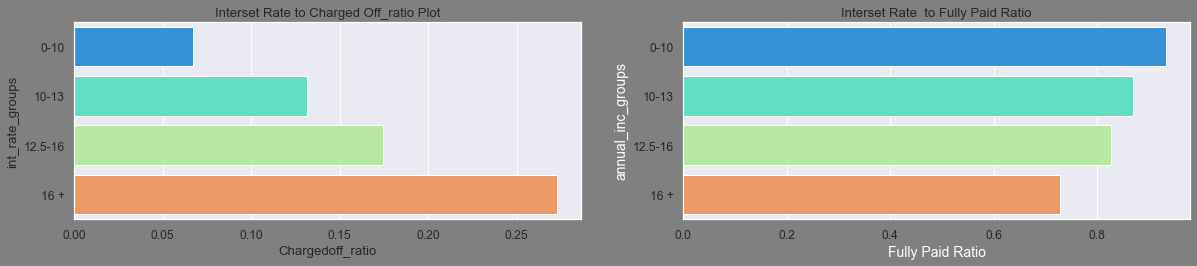

In [453]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(y='int_rate_groups', x='Chargedoff_ratio', data=temp_int,palette='rainbow')
plt.title('Interset Rate to Charged Off_ratio Plot')
plt.subplot(2, 2, 2)

sns.barplot(y='int_rate_groups', x='Fully Paid Ratio', data=temp_int,palette='rainbow')
plt.title('Interset Rate  to Fully Paid Ratio')
plt.ylabel('annual_inc_groups',fontsize=14,color = 'w')
plt.xlabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.show()

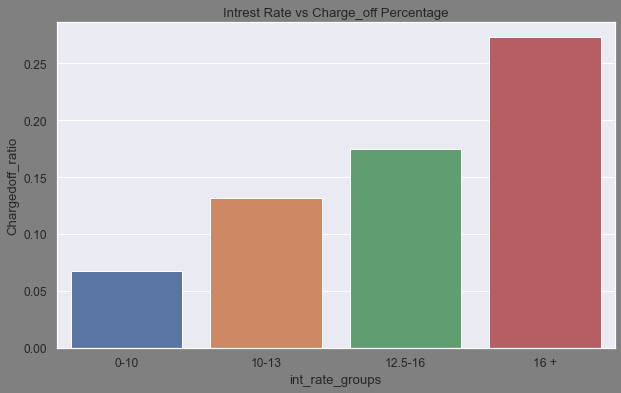

In [326]:
plt.subplots(figsize=(10, 6),facecolor='gray')
sns.barplot(x='int_rate_groups', y='Chargedoff_ratio', data=temp_int)
plt.title("Intrest Rate vs Charge_off Percentage")
plt.show()

In [458]:
temp_int = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack()
temp_int.columns=temp_int.columns.astype('str')

temp_int['Total'] = temp_int['Charged Off'] + temp_int['Fully Paid'] 
temp_int['Chargedoff_ratio'] = temp_int['Charged Off'] / temp_int['Total']
temp_int['Fully Paid_ratio'] = temp_int['Fully Paid'] / temp_int['Total']
temp_int=temp_int.reset_index()
temp_int

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_ratio,Fully Paid_ratio
0,car,160,1339,1499,0.106738,0.893262
1,credit_card,542,4485,5027,0.107818,0.892182
2,debt_consolidation,2767,15288,18055,0.153254,0.846746
3,educational,56,269,325,0.172308,0.827692
4,home_improvement,347,2528,2875,0.120696,0.879304
5,house,59,308,367,0.160763,0.839237
6,major_purchase,222,1928,2150,0.103256,0.896744
7,medical,106,575,681,0.155653,0.844347
8,moving,92,484,576,0.159722,0.840278
9,other,633,3232,3865,0.163777,0.836223


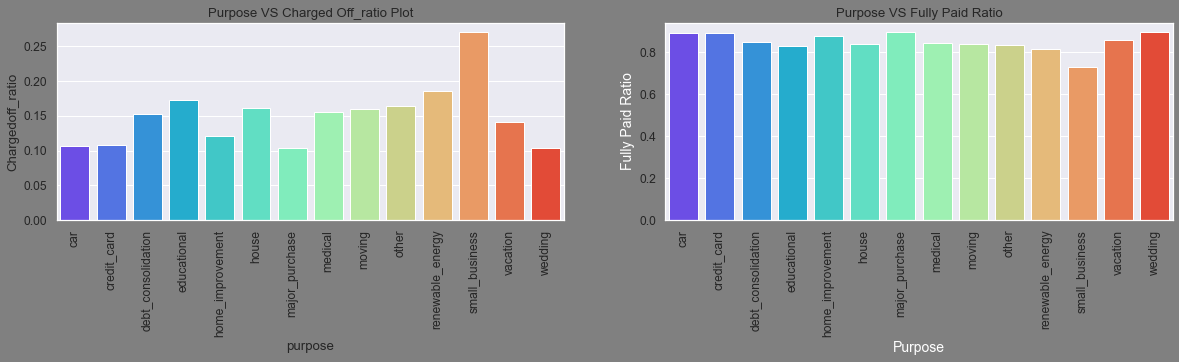

In [466]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(x='purpose', y='Chargedoff_ratio', data=temp_int,palette='rainbow')
plt.title('Purpose VS Charged Off_ratio Plot')
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)

sns.barplot(x='purpose', y='Fully Paid_ratio', data=temp_int,palette='rainbow')
plt.title('Purpose VS Fully Paid Ratio')
plt.ylabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.xlabel('Purpose',fontsize=14,color = 'w')
plt.xticks(rotation=90)
plt.show()

Loan taken for small business is high chargoff ratio

In [516]:
loan_df_temp = loan_df_temp.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack()

loan_df_temp

loan_status,Charged Off,Fully Paid
home_ownership,,
MORTGAGE,2327,14694
OTHER,18,80
OWN,443,2532
RENT,2839,15641


In [517]:
loan_df_temp.columns=loan_df_temp.columns.astype('str')

In [525]:

loan_df_temp['Total'] = loan_df_temp['Charged Off'] + loan_df_temp['Fully Paid']
loan_df_temp['Chargedoff_ratio'] = loan_df_temp['Charged Off'] / loan_df_temp['Total']
loan_df_temp['Fully Paid_ratio'] = loan_df_temp['Fully Paid'] / loan_df_temp['Total']
loan_df_temp['Total']

0    17021
1       98
2     2975
3    18480
Name: Total, dtype: int64

In [523]:


loan_df_temp['Total'] = loan_df_temp['Charged Off'] + loan_df_temp['Fully Paid'] 
loan_df_temp['Chargedoff_ratio'] = loan_df_temp['Charged Off'] / loan_df_temp['Total']
loan_df_temp['Fully Paid_ratio'] = loan_df_temp['Fully Paid'] / loan_df_temp['Total']
loan_df_temp=loan_df_temp.reset_index()
loan_df_temp

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_ratio,Fully Paid_ratio
0,MORTGAGE,2327,14694,17021,0.136713,0.863287
1,OTHER,18,80,98,0.183673,0.816327
2,OWN,443,2532,2975,0.148908,0.851092
3,RENT,2839,15641,18480,0.153626,0.846374


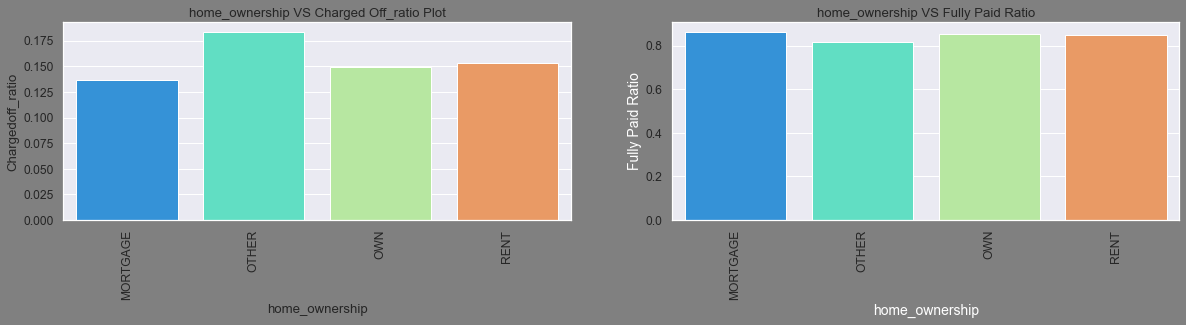

In [526]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(x='home_ownership', y='Chargedoff_ratio', data=loan_df_temp,palette='rainbow')
plt.title('home_ownership VS Charged Off_ratio Plot')
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)

sns.barplot(x='home_ownership', y='Fully Paid_ratio', data=loan_df_temp,palette='rainbow')
plt.title('home_ownership VS Fully Paid Ratio')
plt.ylabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.xlabel('home_ownership',fontsize=14,color = 'w')
plt.xticks(rotation=90)
plt.show()

In [506]:
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [515]:
loan_df_temp=loan_df[~(loan_df.home_ownership=='NONE')]
loan_df_temp.home_ownership.unique()
loan_df_temp

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,pub_rec,initial_list_status,pub_rec_bankruptcies,year,month,approved_amnt_ratio,annual_inc_groups,int_rate_groups,Int_rate_Segment,installment_segment
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0,f,0.0,2011,12,99.50,20000-40000,10-13,Mediam,Mediam
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0,f,0.0,2011,12,100.00,20000-40000,12.5-16,High,Low
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0,f,0.0,2011,12,100.00,0-20000,12.5-16,High,Low
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0,f,0.0,2011,12,100.00,40000-60000,12.5-16,High,Mediam
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,n,wedding,AZ,11.20,0,f,0.0,2011,12,100.00,20000-40000,0-10,Low,Mediam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Not Verified,2007-07-01,Fully Paid,n,home_improvement,CO,11.33,0,f,0.0,2007,7,43.00,80000 +,0-10,Mediam,Low
39713,8500,8500,875.0,36 months,10.28,275.38,C,C1,3,RENT,18000.0,Not Verified,2007-07-01,Fully Paid,n,credit_card,NC,6.40,0,f,0.0,2007,7,10.29,0-20000,10-13,Mediam,Mediam
39714,5000,5000,1325.0,36 months,8.07,156.84,A,A4,1,MORTGAGE,100000.0,Not Verified,2007-07-01,Fully Paid,n,debt_consolidation,MA,2.30,0,f,0.0,2007,7,26.50,80000 +,0-10,Mediam,Mediam
39715,5000,5000,650.0,36 months,7.43,155.38,A,A2,1,MORTGAGE,200000.0,Not Verified,2007-07-01,Fully Paid,n,other,MD,3.72,0,f,0.0,2007,7,13.00,80000 +,0-10,Low,Mediam


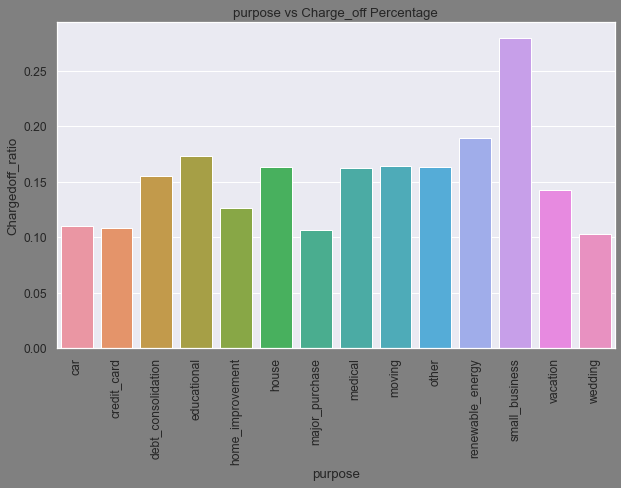

In [121]:
plt.subplots(figsize=(10, 6),facecolor='gray')
sns.barplot(x='purpose', y='Chargedoff_ratio', data=temp_int)
plt.title("purpose vs Charge_off Percentage")
plt.xticks(rotation=90)
plt.show()

Chances of defaulter is high as intrest rate is high 
interest rate more than 16% has good chnaces of charged off as compared to other category intrest rates.

In [470]:
temp_int = loan_df.groupby(['term', 'loan_status']).loan_status.count().unstack()
temp_int.columns=temp_int.columns.astype('str')

temp_int['Total'] = temp_int['Charged Off'] + temp_int['Fully Paid'] 
temp_int['Chargedoff_ratio'] = temp_int['Charged Off'] / temp_int['Total']
temp_int['Fully Paid Ratio'] = temp_int['Fully Paid'] / temp_int['Total']
temp_int=temp_int.reset_index()
temp_int

loan_status,term,Charged Off,Fully Paid,Total,Chargedoff_ratio,Fully Paid Ratio
0,36 months,3227,25869,29096,0.110909,0.889091
1,60 months,2400,7081,9481,0.253138,0.746862


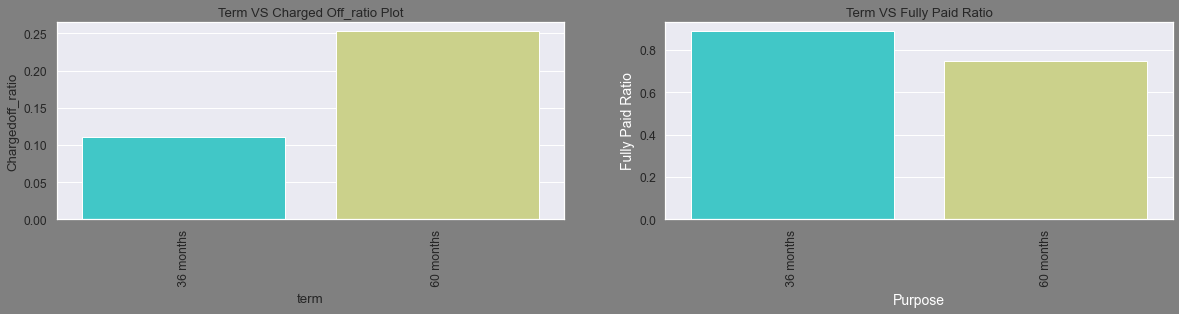

In [480]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(x='term', y='Chargedoff_ratio', data=temp_int,palette='rainbow')
plt.title('Term VS Charged Off_ratio Plot')
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)

sns.barplot(x='term', y='Fully Paid Ratio', data=temp_int,palette='rainbow')
plt.title('Term VS Fully Paid Ratio')
plt.ylabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.xlabel('Purpose',fontsize=14,color = 'w')
plt.xticks(rotation=90)
plt.show()

In [527]:
temp_ver = loan_df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack()
temp_ver.columns=temp_ver.columns.astype('str')

temp_ver['Total'] = temp_ver['Charged Off'] + temp_ver['Fully Paid'] 
temp_ver['Chargedoff_ratio'] = temp_ver['Charged Off'] / temp_ver['Total']
temp_ver['Fully Paid Ratio'] = temp_ver['Fully Paid'] / temp_ver['Total']
temp_ver=temp_ver.reset_index()
temp_ver

loan_status,verification_status,Charged Off,Fully Paid,Total,Chargedoff_ratio,Fully Paid Ratio
0,Not Verified,2142,14552,16694,0.128310,0.871690
1,Source Verified,1434,8243,9677,0.148186,0.851814
2,Verified,2051,10155,12206,0.168032,0.831968


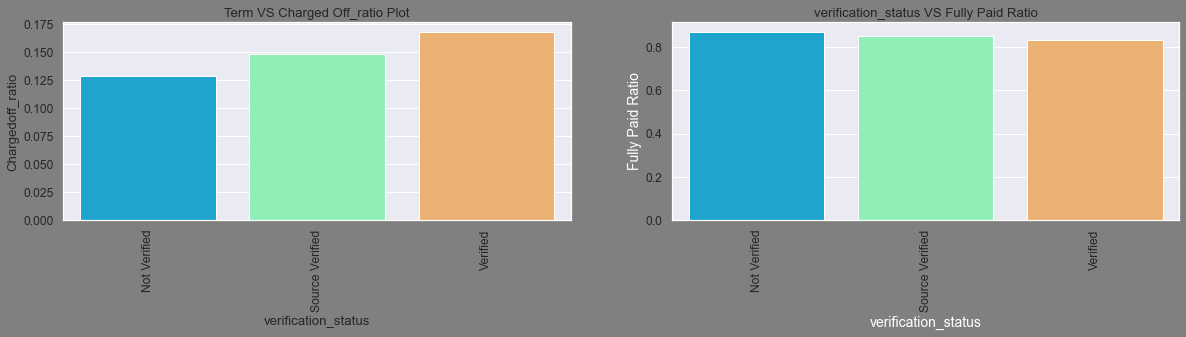

In [528]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(x='verification_status', y='Chargedoff_ratio', data=temp_ver,palette='rainbow')
plt.title('Term VS Charged Off_ratio Plot')
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)

sns.barplot(x='verification_status', y='Fully Paid Ratio', data=temp_ver,palette='rainbow')
plt.title('verification_status VS Fully Paid Ratio')
plt.ylabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.xlabel('verification_status',fontsize=14,color = 'w')
plt.xticks(rotation=90)
plt.show()

No clear conclusion using this graph

In [474]:
temp_elen = loan_df.groupby(['emp_length', 'loan_status']).loan_status.count().unstack()
temp_elen


loan_status,Charged Off,Fully Paid
emp_length,,
0,228,805
1,1095,6582
2,567,3724
3,555,3457
4,462,2880
5,458,2736
6,307,1861
7,263,1448
8,203,1232


In [476]:
temp_elen.columns=temp_elen.columns.astype(str)

In [477]:
temp_elen['Total'] = temp_elen['Charged Off'] + temp_elen['Fully Paid'] 
temp_elen['Chargedoff_ratio'] = temp_elen['Charged Off'] / temp_elen['Total']
temp_elen['Full Paid_ratio'] = temp_elen['Fully Paid'] / temp_elen['Total']
temp_elen=temp_elen.reset_index()
temp_elen

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_ratio,Full Paid_ratio
0,0,228,805,1033,0.220716,0.779284
1,1,1095,6582,7677,0.142634,0.857366
2,2,567,3724,4291,0.132137,0.867863
3,3,555,3457,4012,0.138335,0.861665
4,4,462,2880,3342,0.138241,0.861759
5,5,458,2736,3194,0.143394,0.856606
6,6,307,1861,2168,0.141605,0.858395
7,7,263,1448,1711,0.153711,0.846289
8,8,203,1232,1435,0.141463,0.858537
9,9,158,1068,1226,0.128874,0.871126


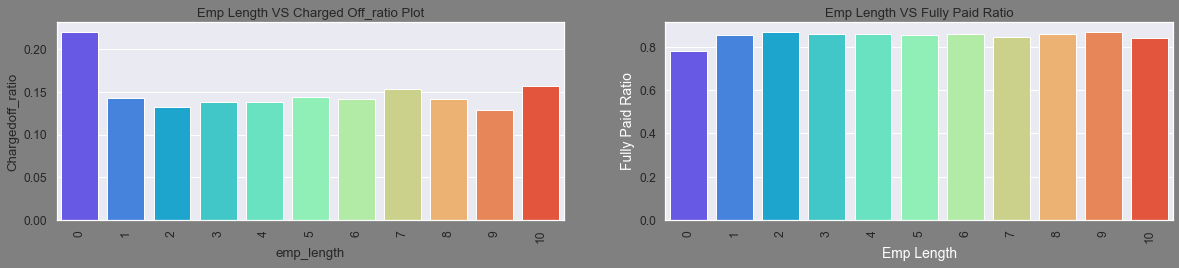

In [484]:
plt.figure(figsize=(20,8),facecolor='gray')
plt.subplot(2, 2, 1)
sns.barplot(x='emp_length', y='Chargedoff_ratio', data=temp_elen,palette='rainbow')
plt.title('Emp Length VS Charged Off_ratio Plot')
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)

sns.barplot(x='emp_length', y='Full Paid_ratio', data=temp_elen,palette='rainbow')
plt.title('Emp Length VS Fully Paid Ratio')
plt.ylabel('Fully Paid Ratio',fontsize=14,color = 'w')
plt.xlabel('Emp Length',fontsize=14,color = 'w')
plt.xticks(rotation=90)
plt.show()

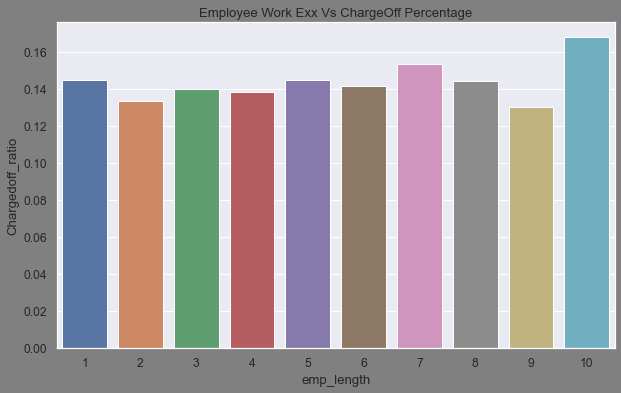

In [131]:
plt.subplots(figsize=(10, 6),facecolor='gray')
sns.barplot(x='emp_length', y='Chargedoff_ratio', data=temp_elen)
plt.title('Employee Work Exp Vs ChargeOff Percentage')
plt.show()

Those who have less than 1 year of work experience have high chances of getting charged off.
rest all have almost same chances of repay the loan

Text(0.5, 1.0, 'DerogatoryPublic VS LoanStatus')

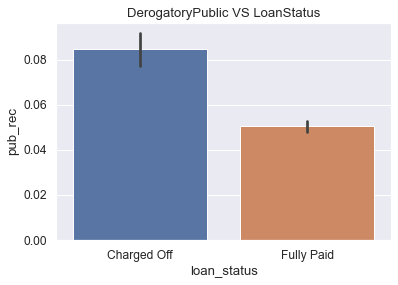

In [499]:
sns.barplot(y='pub_rec', x='loan_status', data=loan_df)
plt.title('DerogatoryPublic VS LoanStatus')

In [ ]:
Pub rec value is high for charged off loan.

Text(0.5, 1.0, 'Public record bankruptcies VS LoanStatus')

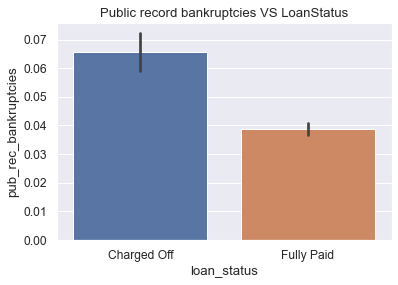

In [502]:
sns.barplot(y='pub_rec_bankruptcies', x='loan_status', data=loan_df)
plt.title('Public record bankruptcies VS LoanStatus')

Public record bankruptcies is high for charged off loan.

In [338]:

temp_state = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack()

temp_state.columns=temp_state.columns.astype(str)
temp_state['Total'] = temp_state['Charged Off'] + temp_state['Fully Paid'] 
temp_state['Chargedoff_ratio'] = temp_state['Charged Off'] / temp_state['Total']
temp_state=temp_state.reset_index()
temp_state

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_ratio
0,AK,15,63,78,0.192308
1,AL,54,381,435,0.124138
2,AR,27,208,235,0.114894
3,AZ,123,726,849,0.144876
4,CA,1125,5824,6949,0.161894
5,CO,98,668,766,0.127937
6,CT,94,632,726,0.129477
7,DC,15,196,211,0.071090
8,DE,12,101,113,0.106195
9,FL,504,2277,2781,0.181230


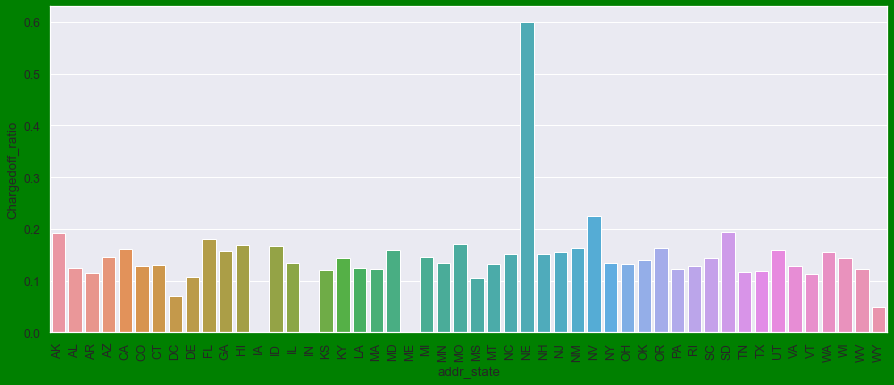

In [339]:
plt.subplots(figsize=(15, 6),facecolor='green')
sns.barplot(x='addr_state', y='Chargedoff_ratio', data=temp_state)
plt.xticks(rotation=90)
plt.show()


As per plot NE is having high charge off but the number is very low. for NV,SD and FL states shows good number of charged offs in good number of applications.


Small Business has more defaults when the loan amount is also high.

<AxesSubplot:xlabel='loan_amnt', ylabel='int_rate'>

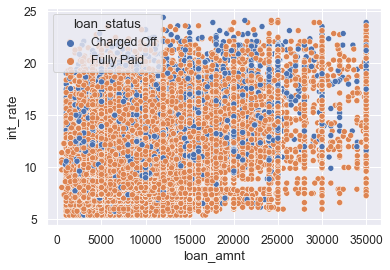

In [344]:
sns.scatterplot(x='loan_amnt', y='int_rate', data=loan_df, hue='loan_status')

In [ ]:
plot()

In [ ]:
no patteran identifed using this graph